In [11]:
#Import Dependencies
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## Prepare the data

1. Read myopia.csv into a Pandas DataFrame.

2. Remove the "MYOPIC" column from the dataset.

- Note: The target column is needed for supervised machine learning, but it will make an unsupervised model biased. After all, the target column is effectively providing clusters already!

3. Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [12]:
# Import the data
df = pd.read_csv('myopia.csv')
df.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [13]:
# Remove the "MYOPIC" column from the dataset.
myopia_data = df.drop(['MYOPIC'], axis=1)
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [14]:
#Standardize your dataset into smaller values.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_data)

## Apply Dimensionality Reduction
1. Perform dimensionality reduction with PCA. How did the number of the features change?

- The change in features were reduced from 14 to 10 with 618 samples.
- The outputs of the PCA can be used as input to train a model.
- PCA is a method used to reduce number of variables in your data by extracting important ones from a large pool.
- It reduces the dimension of the data with the aim of retaining as much information as possible (~90% for our data below).
- In other words, this method combines highly correlated variables together to form a smaller number of an artificial set of variables which is called “principal components” that account for most variance in the data.
- Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by a PCA.
- This is important because it allows us to rank the components in order of importance, and to focus on the most important ones when interpreting the results of our analysis.
- The larger the variance explained by a principal component, the more important that component is.

In [15]:
# Perform dimensionality reduction with PCA at n_components=0.90
pca = PCA(n_components=0.90)
pca_myopia = pca.fit_transform(scaled_data)
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [16]:
# pca_transformed_data variance to detect the importance of components. Principle component 1 and 2 
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [17]:
# Run t-SNE
tsne = TSNE(learning_rate=50)
tsne_features = tsne.fit_transform(pca_myopia)

In [18]:
# Check that dimensions have been reduced to two
tsne_features.shape

(618, 2)

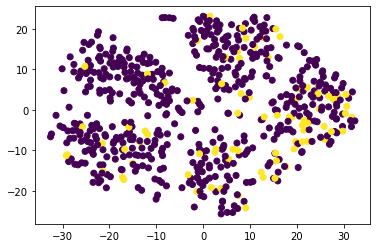

In [26]:
plt.scatter(tsne_features[:,0],tsne_features[:,1], c=myopia_data["Myopic"])
plt.show()

In [27]:
labels = myopia_data["Myopic"]
labels.value_counts()

0    537
1     81
Name: Myopic, dtype: int64

## Perform a Cluster Analysis with K-means

Create an elbow plot to identify the best number of clusters. Make sure to do the following:


- Use a for loop to determine the inertia for each k between 1 through 10.


- If possible, determine where the elbow of the plot is, and at which value of k it appears.

In [31]:
df_myopia_pca = pd.DataFrame(data=pca_myopia, columns=["component 1", "component 2",
                                                                "component 3","component 4",
                                                                "component 5","component 6",
                                                                "component 7","component 8",
                                                                "component 9","component 10"])
df_myopia_pca.head()

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,component 9,component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [55]:
import warnings
warnings.filterwarnings('ignore')

# Use a for loop to determine the inertia for each k between 1 through 10
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,8102.991106
1,2,6794.415695
2,3,6079.369308
3,4,5722.663574
4,5,5414.165009


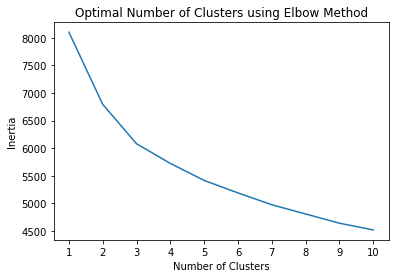

In [59]:
# Plot the elbow curve to find the best candidate(s) for k
# The small elbow appears at number 3 and start to flattens out, meaning the best number for k is 3

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(1,11)))
plt.title('Optimal Number of Clusters using Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [47]:
# Applying kMeans to PCA principal components
# The function should return a DataFrame copy of Data that should include a new column containing the clusters found.

def get_clusters(k, df_myopia_pca):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(df_myopia_pca)

    # Predict clusters
    predictions = model.predict(df_myopia_pca)

    # Create return DataFrame with predicted clusters
    df_myopia_pca["myopic"] = model.labels_

    return df_myopia_pca

In [48]:
clusters = get_clusters(2, df_myopia_pca)
clusters.head()

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,component 9,component 10,myopic
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


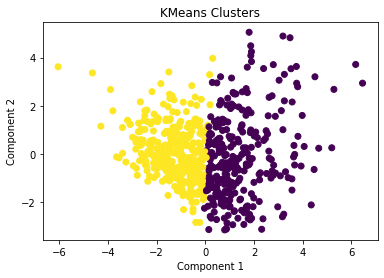

In [56]:
def show_clusters(df_myopia_pca):
    plt.scatter(df_myopia_pca['component 1'], df_myopia_pca['component 2'], 
                c=df_myopia_pca['myopic'])
    plt.title('KMeans Clusters')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

show_clusters(clusters)

## Make a Recommendation
Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?

Here’s the plan for the analysis above:

1. Standardize the data
2. Feature Reduction via PCA
3. Feature Reduction via t-SNE
4. Applying KMeans using Elbow Method
5. Analyze derived clusters with best value of k

I found that:

- The best K value according to the Elbow Curve Plot is 3, where a small sharp elbow appears. This occurs possibly because the data is not very clustered, therefore we did not have a defined elbow. My recommendation is use a different method for determining the optimal k, such as computing Silhouette Scores.

- In the last scatter splot above, there are 2 defined clusters appear to be very centered, dense, and even touching each other. Usually a density based cluster is often employed when clusters are irregular or intertwined, and when noise and outliers are present. We might reevaluate whether clustering is the right thing to do on our data. 

- Whether if the patients can be clustered or not, based on our findings using PCA, T-SNE, and KMeans, my answer is inconclusive. I would explore other methods instead. 
